In [3]:
from google.colab import files
files.upload()

Saving NASDAQ_100_Data_From_2010.csv to NASDAQ_100_Data_From_2010.csv


In [4]:
pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 5.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv("NASDAQ_100_Data_From_2010.csv", sep='\t')
data = data[['Date', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name']]

# Specify columns to convert to numeric
numeric_columns = ['High', 'Low', 'Close', 'Adj Close', 'Volume']

# Convert specified columns to numeric data types
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [7]:
data.head()

,Date,High,Low,Close,Adj Close,Volume,Name
0,2010-01-04,7.660714,7.585000,7.643214,6.562591,493729600,AAPL
1,2010-01-05,7.699643,7.616071,7.656429,6.573935,601904800,AAPL
2,2010-01-06,7.686786,7.526786,7.534643,6.469369,552160000,AAPL
3,2010-01-07,7.571429,7.466071,7.520714,6.457407,477131200,AAPL
4,2010-01-08,7.571429,7.466429,7.570714,6.500339,447610800,AAPL


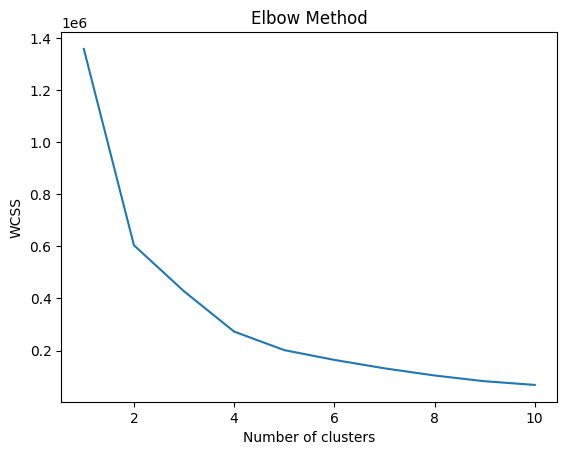

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['High', 'Low', 'Close', 'Adj Close', 'Volume']

# Extract the selected columns
stock_data = data[selected_columns]

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(stock_data)

# Determine the optimal number of clusters (k) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to determine k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()